In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from scipy.stats import norm
from scipy.special import expit

In [2]:
plt.style.use("ggplot")

### **Linear Classifiers**

In [3]:
# Ejercicio 1

In [4]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

Z_train, Z_test = scaler.transform(X_train), scaler.transform(X_test)

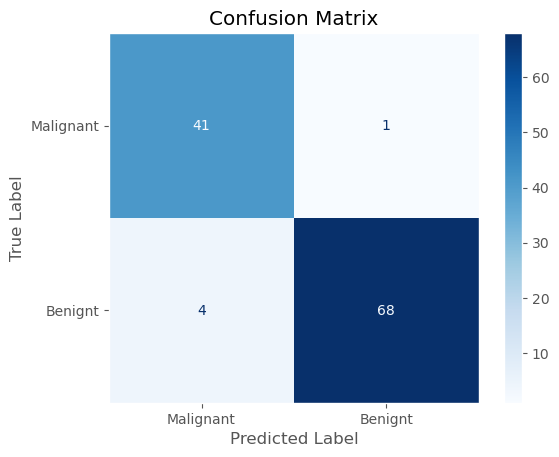

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [7]:
# Perceptron

perceptron = Perceptron(random_state=42)
perceptron.fit(Z_train, y_train)

y_pred = perceptron.predict(Z_test)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benignt"])
cm.plot(cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))

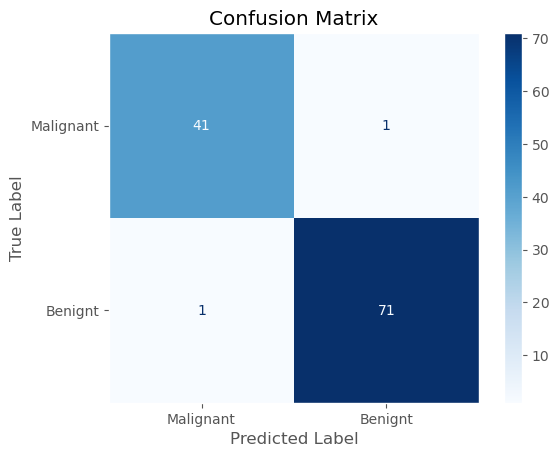

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [8]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(Z_train, y_train)

y_pred = logreg.predict(Z_test)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benignt"])
cm.plot(cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))

In [9]:
# Ejercicio 2

In [10]:
np.random.seed(42)

n = 50

mu0 = 0.5
mu1 = 2.5

sigma = 0.5

X0 = norm.rvs(mu0, sigma, n)
y0 = np.zeros(n)

X1 = norm.rvs(mu1, sigma, n)
y1 = np.ones(n)

In [11]:
X = np.concatenate([X0, X1]).reshape(-1, 1)
y = np.concatenate([y0, y1])

In [12]:
linreg = LinearRegression()
linreg.fit(X, y)

y_lin = lambda z: linreg.coef_ * z + linreg.intercept_

In [13]:
logreg = LogisticRegression()
logreg.fit(X, y)

y_log = lambda z: expit(logreg.coef_ * z + logreg.intercept_).ravel()

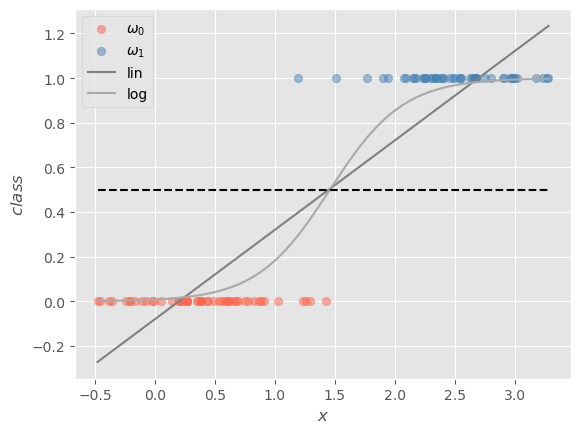

In [14]:
plt.scatter(X0, y0, color="tomato", alpha=0.5, label=r"$\omega_0$")
plt.scatter(X1, y1, color="steelblue", alpha=0.5, label=r"$\omega_1$")

z = np.linspace(min(X), max(X), 150)

plt.plot(z, y_lin(z), color="gray", label="lin")
plt.plot(z, y_log(z), color="darkgray", label="log")

plt.hlines(y=0.5, xmin=z[0], xmax=z[-1], colors="black", linestyles="--")

plt.xlabel(r"$x$")
plt.ylabel(r"$class$")

plt.legend()

plt.show()